# Results of TSD, DANN, SCADANN models across 10 days of inward rotation starting at Day_0~5 for Subject_4

Library used can be downloaded from https://github.com/aonai/long_term_EMG_myo   
&emsp; Original by UlysseCoteAllard https://github.com/UlysseCoteAllard/LongTermEMG   
Dataset recorded by https://github.com/Suguru55/Wearable_Sensor_Long-term_sEMG_Dataset   
Extended robot project can be found in https://github.com/aonai/myo_robot_arm

### Notes
* weights for TSD are total of 50 training models, 10 for each day
* weights for DANN and SCADANN are total of 45 trianing models, 9 for each day


* training examples should have shape (1, 5,)
* first session has shape (24, 572, 252)
* the following sessions have shape (4, 572, 252)
* training labels should have shape (1, 5,)


* location 0, 1, and 2 corresponds to neutral position, inward rotation, and outward rotation respectively
* session mentioned below are days, so number of sessions is 10



In [1]:
import os, sys
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import torch
import pandas as pd 

In [2]:
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
os.chdir(code_dir)
from PrepareAndLoadData.process_data import read_data_training

# 0. Prepare Data
use `switch=2` to train across days and individually on wearing location 0 (`session_in_include=[0]`)

### specify the directories used for running the code:
* `code_diar`: path to long_term_EMG_myo library
* `data_dir`: where raw dataset is loaded; raw data is in csv format
* `processed_data_dir`: where processed dataset is loaded; processed data is in npy pickle format
    * processed data should be a ndarray of shape   
    (controlling_factor_1 x controlling_factor_2 x num_sessions_per_gesture x #examples_window*#mov(26*22=572) x processed_channel_shape(252 for TSD, (4,8,10) for ConvNet)
* `path_<model_name>`: where model weights are saved
    * weights should be saved in folder `/Weights/<model_name>`. Each folder has subfolders containing weights for the first controlling factor.
    * weights for base model (TSD or ConvNet) contain m set of training model
    * weights for DANN and SCADANN contain m-1 set of trianing model (these models are trianed based on TSD, so they do not have a best_state_0.pt model). 
* `save_<model_name>`: where model results are saved
    * each result for testing a model on a group of dataset is saved in folder `results`. Each result has corresponding 
        * `<model_name>.txt` includes predictions, ground truths, array of accuracies for each participant and each session, and overall accuracy
        * `predictions_<model_name>.npy` includes array of accuracies, ground truths, predictions, and model outputs (probability array for each prediction)
        * remember to make blank files in these names before saving



* use `read_data_training` to process raw dataset
        

In [3]:
data_dir = "/home/laiy/gitrepos/msr_final/Wearable_Sensor_Long-term_sEMG_Dataset/data"
processed_data_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Processed_datasets_all_across_day_loc_1_lump6"
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
save_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Results"

path_TSD ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump6/TSD"
save_TSD = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_DANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump6/DANN"
save_DANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_SCADANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump6/SCADANN"
save_SCADANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

In [4]:
read_data_training(path=data_dir, store_path = processed_data_dir,  
                   sessions_to_include =[1], switch=2, include_in_first=6,
                   start_at_participant=5, num_participant=1)

Loading and preparing Training datasets...
session  1  --- process data in days  [2, 5, 6, 16, 17, 18, 22, 24, 25, 28]
index_participant_list  [5]
READ  Sub 5 _Loc 1 _Day 2
examples_per_session =  (1, 4, 572, 252)
READ  Sub 5 _Loc 1 _Day 5
Include day  5  in first dataset  (4, 572, 252)
examples of first session =  (8, 572, 252)
examples_per_session =  (1, 8, 572, 252)
READ  Sub 5 _Loc 1 _Day 6
Include day  6  in first dataset  (8, 572, 252)
examples of first session =  (12, 572, 252)
examples_per_session =  (1, 12, 572, 252)
READ  Sub 5 _Loc 1 _Day 16
Include day  16  in first dataset  (12, 572, 252)
examples of first session =  (16, 572, 252)
examples_per_session =  (1, 16, 572, 252)
READ  Sub 5 _Loc 1 _Day 17
Include day  17  in first dataset  (16, 572, 252)
examples of first session =  (20, 572, 252)
examples_per_session =  (1, 20, 572, 252)
READ  Sub 5 _Loc 1 _Day 18
Include day  18  in first dataset  (20, 572, 252)
examples of first session =  (24, 572, 252)
examples_per_session 

/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


examples_per_session =  (2,)
READ  Sub 5 _Loc 1 _Day 24
examples_per_session =  (3,)
READ  Sub 5 _Loc 1 _Day 25
examples_per_session =  (4,)
READ  Sub 5 _Loc 1 _Day 28
examples_per_session =  (5,)
@ traning sessions =  (1, 5)
traning examples  (1, 5)
traning labels  (1, 5)
all traning examples  (1, 5)
all traning labels  (1, 5)


In [5]:
# check stored pickle 
with open(processed_data_dir + "/training_session.pickle", 'rb') as f:
    dataset_training = pickle.load(file=f)

examples_datasets_train = dataset_training['examples_training']
print('traning examples ', np.shape(examples_datasets_train))
labels_datasets_train = dataset_training['labels_training']
print('traning labels ', np.shape(labels_datasets_train))

traning examples  (1, 5)
traning labels  (1, 5)


In [6]:
for idx, examples_per_session in enumerate (examples_datasets_train[0]):
    print(idx, " examples_per_session = ", np.shape(examples_per_session))
    print(idx, " labels_per_session = ", np.shape(labels_datasets_train[0][idx]))

0  examples_per_session =  (24, 572, 252)
0  labels_per_session =  (24, 572)
1  examples_per_session =  (4, 572, 252)
1  labels_per_session =  (4, 572)
2  examples_per_session =  (4, 572, 252)
2  labels_per_session =  (4, 572)
3  examples_per_session =  (4, 572, 252)
3  labels_per_session =  (4, 572)
4  examples_per_session =  (4, 572, 252)
4  labels_per_session =  (4, 572)


### Specify params used for training and testing

During training and testing, processed datasets are first put into pytorch dataloders, then feed to the model trainer; following are params for TSD model and dataloaders

* `num_kernels`: list of integers defining number of neurons used in each linear layer (linear block has `dropout`=0.5)
* `number_of_cycles_total`: number of trails performed for each session (assuming that all session have the same trail size)
    * 4 for myo across day training
* `number_of_classes`: total number of gestures performed in dataset
    * 22 for myo
* `batch_size`: number of examples stored in each batch
* `feature_vector_input_length`: length of input array or each processed signal; i.e. size of one training example 
    * 252 for TSD
* `learning_rate`= 0.002515
    

In [7]:
num_kernels=[200, 200, 200]                                
number_of_cycle_for_first_training = np.shape(examples_datasets_train[0][0])[0]               
number_of_cycles_total=np.shape(examples_datasets_train[-1][-1])[0]               
print("number_of_cycle_for_first_training ", number_of_cycle_for_first_training)
print("number_of_cycles_total ", number_of_cycles_total)
number_of_classes=22
batch_size=128          
feature_vector_input_length=252                     
learning_rate=0.002515

number_of_cycle_for_first_training  24
number_of_cycles_total  4


# 1. TSD_DNN
* `train_fine_tuning`: used to train data using a base model (TSD or ConvNet)
    * running this function will save num_sessions sets of TSD model weights (each is fine tuned based on the previous training)  
    
* `test_standard_model_on_training_sessions`: test model result


### check if dataloaders are loaded correctly:
* each participant has shape (num_session x 40 x 572 x 252)
* each session has shape (40 x 572 x 252)
* put these data into on group ends up with shape (40*572=22880, 252)
    * shuffle on group of data and put into dataloaders
    * each participant should have num_sessions sets of dataloaders, each correspond to one session
   

In [8]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_standard import \
            test_standard_model_on_training_sessions, train_fine_tuning

In [9]:
train_fine_tuning(examples_datasets_train, labels_datasets_train,
                  num_kernels=num_kernels, path_weight_to_save_to=path_TSD,
                  number_of_classes=number_of_classes, 
                  number_of_cycles_total=number_of_cycles_total,
                  number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                  batch_size=batch_size,
                  feature_vector_input_length=feature_vector_input_length,
                  learning_rate=learning_rate)

GET one participant_examples  (5,)
   GET one training_index_examples  (24, 572, 252)  at  0
   GOT one group XY  (13728, 252)    (13728,)
       one group XY test  (0,)    (0,)
       one group XY train (12355, 252)    (12355,)
       one group XY valid (1373, 252)    (1373, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252

train Loss: 0.00219992 Acc: 0.90136719
val Loss: 0.00106811 Acc: 0.92576419
Epoch 7 of 500 took 0.108s
Epoch 7/499
----------
train Loss: 0.00223141 Acc: 0.89941406
val Loss: 0.00068689 Acc: 0.93886463
New best validation loss: 0.0006868906937311831
Epoch 8 of 500 took 0.108s
Epoch 8/499
----------
train Loss: 0.00193286 Acc: 0.91601562
val Loss: 0.00070329 Acc: 0.92576419
Epoch 9 of 500 took 0.112s
Epoch 9/499
----------
train Loss: 0.00213306 Acc: 0.90087891
val Loss: 0.00121157 Acc: 0.90829694
Epoch 10 of 500 took 0.112s
Epoch 10/499
----------
train Loss: 0.00209554 Acc: 0.90380859
val Loss: 0.00071695 Acc: 0.930131
Epoch 11 of 500 took 0.109s
Epoch 11/499
----------
train Loss: 0.00184711 Acc: 0.92236328
val Loss: 0.00061706 Acc: 0.96069869
Epoch 12 of 500 took 0.105s
Epoch 12/499
----------
train Loss: 0.00174996 Acc: 0.91650391
val Loss: 0.00096747 Acc: 0.92576419
Epoch 13 of 500 took 0.108s
Epoch 13/499
----------
train Loss: 0.00173199 Acc: 0.92138672
val Loss: 0.00075956 Acc:

train Loss: 0.00126332 Acc: 0.93798828
val Loss: 0.00066226 Acc: 0.94759825
Epoch 20 of 500 took 0.114s
Epoch 20/499
----------
train Loss: 0.00128528 Acc: 0.94042969
val Loss: 0.00063503 Acc: 0.95633188
Epoch 21 of 500 took 0.108s
Epoch 21/499
----------
train Loss: 0.00116863 Acc: 0.94287109
val Loss: 0.00043594 Acc: 0.96069869
Epoch 22 of 500 took 0.108s
Epoch 22/499
----------
train Loss: 0.00125915 Acc: 0.94287109
val Loss: 0.00056482 Acc: 0.95196507
Epoch    23: reducing learning rate of group 0 to 5.0300e-04.
Epoch 23 of 500 took 0.105s
Epoch 23/499
----------
train Loss: 0.00114378 Acc: 0.94580078
val Loss: 0.00036737 Acc: 0.97816594
Epoch 24 of 500 took 0.110s
Epoch 24/499
----------
train Loss: 0.00090189 Acc: 0.95507812
val Loss: 0.00043304 Acc: 0.96943231
Epoch 25 of 500 took 0.106s
Epoch 25/499
----------
train Loss: 0.00093333 Acc: 0.95800781
val Loss: 0.00042610 Acc: 0.9650655
Epoch 26 of 500 took 0.107s
Epoch 26/499
----------
train Loss: 0.00089995 Acc: 0.9609375
val L

In [10]:
algo_name = "standard_TSD"
test_standard_model_on_training_sessions(examples_datasets_train, labels_datasets_train,
                                  num_neurons=num_kernels, use_only_first_training=True,
                                  path_weights=path_TSD,
                                  feature_vector_input_length=feature_vector_input_length,
                                  save_path = save_TSD, algo_name=algo_name,
                                  number_of_cycles_total=number_of_cycles_total,
                                  number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                                  number_of_classes=number_of_classes, cycle_for_test=3)

GET one participant_examples  (5,)
   GET one training_index_examples  (24, 572, 252)  at  0
   GOT one group XY  (13728, 252)    (13728,)
       one group XY test  (3432, 252)    (3432, 252)
       one group XY train (12355, 252)    (12355,)
       one group XY valid (1373, 252)    (1373, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)

In [13]:
results_filename = save_TSD + '/predictions_' + algo_name + "_no_retraining.npy"
results = np.load(results_filename, allow_pickle=True)
TSD_acc = results[0]
TSD_acc_overall = np.mean(TSD_acc)
index_participant_list = ['0~5', 6, 7, 8, 9]
TSD_df = pd.DataFrame(TSD_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
TSD_df

,Participant_5
Day_0~5,0.887529
Day_6,0.798951
Day_7,0.734266
Day_8,0.725524
Day_9,0.713287


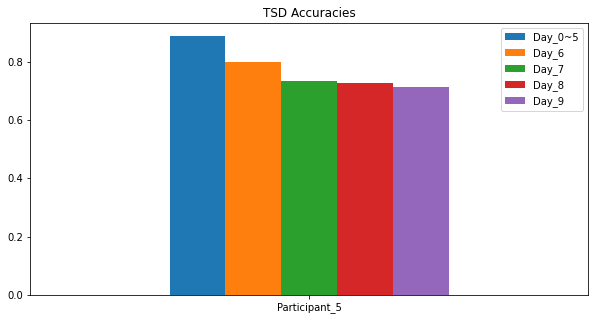

In [14]:
TSD_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("TSD Accuracies")
plt.show()

In [15]:
from TrainingsAndEvaluations.ForTrainingSessions.utils import get_gesture_accuracies

In [16]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Loc1_Sub"
n_name = "Day0~5->"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 5)
predictions =  (1, 5)
index_participant_list  ['0~5', 6, 7, 8, 9]
accuracies_gestures =  (22, 5)


,Unnamed: 0,Loc1_Sub5_Day0~5->0~5,Loc1_Sub5_Day0~5->6,Loc1_Sub5_Day0~5->7,Loc1_Sub5_Day0~5->8,Loc1_Sub5_Day0~5->9
0,M0,1.000000,1.000000,1.000000,1.000000,1.000000
1,M1,0.955128,0.730769,0.500000,0.500000,0.384615
2,M2,0.846154,0.576923,0.653846,0.769231,0.692308
3,M3,0.942308,0.846154,0.076923,0.846154,0.192308
4,M4,0.852564,0.000000,0.000000,0.115385,0.000000
5,M5,0.993590,1.000000,0.384615,0.961538,0.653846
6,M6,0.961538,0.423077,0.615385,0.384615,1.000000
7,M7,0.980769,1.000000,1.000000,1.000000,0.961538
8,M8,0.935897,1.000000,1.000000,1.000000,1.000000
9,M9,0.935897,1.000000,1.000000,1.000000,0.884615


# 2. DANN
* `train_DANN`: train DANN model using the first set of training weights from base model
    * num_sessions-1 sets of training weights will be saved
* `test_DANN_on_training_sessions`: test DANN model

In [17]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_DA import train_DANN, test_DANN_on_training_sessions

In [18]:
train_DANN(examples_datasets_train, labels_datasets_train, 
          num_kernels=num_kernels,
          path_weights_fine_tuning=path_TSD,
          number_of_classes=number_of_classes,
          number_of_cycles_total = number_of_cycles_total,
          number_of_cycle_for_first_training = number_of_cycle_for_first_training,
          batch_size=batch_size,
          feature_vector_input_length=feature_vector_input_length,
          path_weights_to_save_to=path_DANN, learning_rate=learning_rate)

GET one participant_examples  (5,)
   GET one training_index_examples  (24, 572, 252)  at  0
   GOT one group XY  (13728, 252)    (13728,)
       one group XY test  (0,)    (0,)
       one group XY train (12355, 252)    (12355,)
       one group XY valid (1373, 252)    (1373, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252

Accuracy source 0.886719, main loss classifier 0.229451, source classification loss 0.324141, loss domain distinction 0.181072, accuracy domain distinction 0.500000
VALIDATION Loss: 0.28464296 Acc: 0.88929352
Training complete in 0m 6s
()
=> loading checkpoint '/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump6/TSD/participant_0/best_state_0.pt'
Loading Optimizer
=> loaded checkpoint '/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump6/TSD/participant_0/best_state_0.pt' (epoch 5)
STARTING TRAINING
Accuracy source 0.834961, main loss classifier 0.309515, source classification loss 0.462662, loss domain distinction 0.276731, accuracy domain distinction 0.487793
VALIDATION Loss: 0.39522079 Acc: 0.84996358
New best validation loss:  0.3952207863330841
Epoch 1 of 500 took 0.239s
Accuracy source 0.837402, main loss classifier 0.310665, source classificati

Accuracy source 0.880371, main loss classifier 0.252671, source classification loss 0.350039, loss domain distinction 0.273564, accuracy domain distinction 0.488525
VALIDATION Loss: 0.28944197 Acc: 0.88419519
New best validation loss:  0.2894419729709625
Epoch 1 of 500 took 0.238s
Accuracy source 0.837891, main loss classifier 0.301200, source classification loss 0.455956, loss domain distinction 0.191848, accuracy domain distinction 0.500244
VALIDATION Loss: 0.36086997 Acc: 0.8616169
Epoch 2 of 500 took 0.237s
Accuracy source 0.829590, main loss classifier 0.314095, source classification loss 0.483357, loss domain distinction 0.189004, accuracy domain distinction 0.500000
VALIDATION Loss: 0.29636106 Acc: 0.89147851
Epoch 3 of 500 took 0.238s
Accuracy source 0.844238, main loss classifier 0.300801, source classification loss 0.458404, loss domain distinction 0.187665, accuracy domain distinction 0.500000
VALIDATION Loss: 0.43677828 Acc: 0.8390386
Epoch 4 of 500 took 0.238s
Accuracy sou

Accuracy source 0.870605, main loss classifier 0.260934, source classification loss 0.384344, loss domain distinction 0.183658, accuracy domain distinction 0.500000
VALIDATION Loss: 0.36247942 Acc: 0.86962855
Epoch 8 of 500 took 0.237s
Accuracy source 0.871582, main loss classifier 0.252393, source classification loss 0.366868, loss domain distinction 0.185903, accuracy domain distinction 0.500000
VALIDATION Loss: 0.30358154 Acc: 0.88273853
Epoch 9 of 500 took 0.236s
Accuracy source 0.886230, main loss classifier 0.228671, source classification loss 0.320788, loss domain distinction 0.182212, accuracy domain distinction 0.500000
VALIDATION Loss: 0.33752844 Acc: 0.8776402
Epoch 10 of 500 took 0.234s
Accuracy source 0.882324, main loss classifier 0.235784, source classification loss 0.335103, loss domain distinction 0.182685, accuracy domain distinction 0.500000
VALIDATION Loss: 0.31242889 Acc: 0.88419519
Epoch 11 of 500 took 0.235s
Accuracy source 0.895996, main loss classifier 0.221724

In [19]:
algo_name = "DANN"
test_DANN_on_training_sessions(examples_datasets_train, labels_datasets_train,
                              feature_vector_input_length=feature_vector_input_length,
                              num_neurons=num_kernels, path_weights_DA=path_DANN,
                              algo_name=algo_name, save_path = save_DANN, 
                              number_of_cycles_total=number_of_cycles_total,
                              number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                              path_weights_normal=path_TSD, number_of_classes=number_of_classes,
                              cycle_for_test=3)

GET one participant_examples  (5,)
   GET one training_index_examples  (24, 572, 252)  at  0
   GOT one group XY  (13728, 252)    (13728,)
       one group XY test  (3432, 252)    (3432, 252)
       one group XY train (12355, 252)    (12355,)
       one group XY valid (1373, 252)    (1373, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)

In [20]:
results_filename = save_DANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
DANN_acc = results[0]
DANN_acc_overall = np.mean(DANN_acc)
DANN_df = pd.DataFrame(DANN_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
DANN_df

,Participant_5
Day_0~5,0.887529
Day_6,0.86014
Day_7,0.828671
Day_8,0.763986
Day_9,0.734266


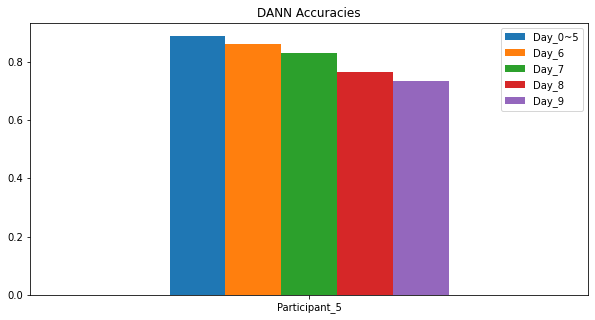

In [21]:
DANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("DANN Accuracies")
plt.show()

In [22]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_DANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 5)
predictions =  (1, 5)
index_participant_list  ['0~5', 6, 7, 8, 9]
accuracies_gestures =  (22, 5)


,Unnamed: 0,Loc1_Sub5_Day0~5->0~5,Loc1_Sub5_Day0~5->6,Loc1_Sub5_Day0~5->7,Loc1_Sub5_Day0~5->8,Loc1_Sub5_Day0~5->9
0,M0,1.000000,1.000000,1.000000,1.000000,1.000000
1,M1,0.955128,0.807692,0.615385,0.423077,0.423077
2,M2,0.846154,0.730769,0.884615,0.884615,0.769231
3,M3,0.942308,0.884615,0.730769,1.000000,0.346154
4,M4,0.852564,0.346154,0.346154,0.384615,0.000000
5,M5,0.993590,1.000000,0.615385,0.923077,0.884615
6,M6,0.961538,0.653846,1.000000,0.653846,1.000000
7,M7,0.980769,1.000000,1.000000,1.000000,0.884615
8,M8,0.935897,0.884615,0.692308,0.923077,0.884615
9,M9,0.935897,0.884615,0.730769,0.692308,0.576923


# 3. SCADANN

* `run_SCADANN_training_sessions`: train SCADANN model. The first session uses TSD model_0 wegits; others use DANN weights
    * specify `percentage_same_gesture_stable` based on the performance of most pseudo labels: 
        * print accuracies out and check what percentage will optimize `ACCURACY MODEL` and `ACCURACY PSEUDO` without cutting out too much data 
    * num_sessions-1 sets of training weights will be saved


In [23]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_SCADANN import \
    run_SCADANN_training_sessions, test_network_SCADANN

In [24]:
percentage_same_gesture_stable = 0.75 
run_SCADANN_training_sessions(examples_datasets=examples_datasets_train, labels_datasets=labels_datasets_train,
                              num_kernels=num_kernels, feature_vector_input_length=feature_vector_input_length,
                              path_weights_to_save_to=path_SCADANN,
                              path_weights_Adversarial_training=path_DANN,
                              path_weights_Normal_training=path_TSD,
                              number_of_cycles_total = number_of_cycles_total, 
                              number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                              number_of_classes=number_of_classes,
                              learning_rate=learning_rate)

GET one participant_examples  (5,)
   GET one training_index_examples  (24, 572, 252)  at  0
   GOT one group XY  (13728, 252)    (13728,)
       one group XY test  (0,)    (0,)
       one group XY train (13728, 252)    (13728,)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  4
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
dataloaders: 
 

/home/laiy/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Accuracy total 0.878005, main loss classifier 0.504287, source accuracy 0.884615 source classification loss 0.351019, target accuracy 0.871394 target loss 0.429698 accuracy domain distinction 0.500000 loss domain distinction 1.139283,
VALIDATION Loss: 0.26080588 Acc: 0.89647059
New best validation loss:  0.26080588144915445
Epoch 2 of 500 took 0.349s
Accuracy total 0.882212, main loss classifier 0.462078, source accuracy 0.885817 source classification loss 0.333930, target accuracy 0.878606 target loss 0.377883 accuracy domain distinction 0.500000 loss domain distinction 1.061713,
VALIDATION Loss: 0.16428584 Acc: 0.95058824
New best validation loss:  0.16428584073271071
Epoch 3 of 500 took 0.341s
Accuracy total 0.875601, main loss classifier 0.471174, source accuracy 0.877404 source classification loss 0.348966, target accuracy 0.873798 target loss 0.385012 accuracy domain distinction 0.500000 loss domain distinction 1.041851,
VALIDATION Loss: 0.17722240 Acc: 0.93176471
Epoch 4 of 500 

Accuracy total 0.892428, main loss classifier 0.425112, source accuracy 0.890024 source classification loss 0.328270, target accuracy 0.894832 target loss 0.315026 accuracy domain distinction 0.500000 loss domain distinction 1.034643,
VALIDATION Loss: 0.14186172 Acc: 0.96
Epoch    27: reducing learning rate of group 0 to 4.0240e-06.
Epoch 28 of 500 took 0.338s
Accuracy total 0.895433, main loss classifier 0.420448, source accuracy 0.890625 source classification loss 0.313277, target accuracy 0.900240 target loss 0.321137 accuracy domain distinction 0.500000 loss domain distinction 1.032408,
VALIDATION Loss: 0.13990670 Acc: 0.95764706
Epoch 29 of 500 took 0.339s
Accuracy total 0.883413, main loss classifier 0.444636, source accuracy 0.868389 source classification loss 0.359675, target accuracy 0.898438 target loss 0.323224 accuracy domain distinction 0.500000 loss domain distinction 1.031864,
VALIDATION Loss: 0.17016440 Acc: 0.93647059
Epoch 30 of 500 took 0.345s
Accuracy total 0.890925

BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  17
ACCURACY MODEL:  0.8548951048951049   Accuracy pseudo: 0.9382948657560056  len pseudo:  2123    len predictions 2288
HANDLING NEW SESSION  2
Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5384615384615384   AFTER:  0.5384615384615384  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  5
BEFORE:  0.11538461538461539   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1

Accuracy total 0.865313, main loss classifier 0.496695, source accuracy 0.871875 source classification loss 0.359154, target accuracy 0.858750 target loss 0.426605 accuracy domain distinction 0.500000 loss domain distinction 1.038152,
VALIDATION Loss: 0.24997185 Acc: 0.90346535
New best validation loss:  0.24997184638466155
Epoch 5 of 500 took 0.346s
Accuracy total 0.875000, main loss classifier 0.487253, source accuracy 0.889375 source classification loss 0.335889, target accuracy 0.860625 target loss 0.430757 accuracy domain distinction 0.500000 loss domain distinction 1.039304,
VALIDATION Loss: 0.25281492 Acc: 0.91336634
Epoch 6 of 500 took 0.335s
Accuracy total 0.877812, main loss classifier 0.486684, source accuracy 0.878125 source classification loss 0.376380, target accuracy 0.877500 target loss 0.388334 accuracy domain distinction 0.500000 loss domain distinction 1.043271,
VALIDATION Loss: 0.24326661 Acc: 0.91584158
New best validation loss:  0.24326660909823009
Epoch 7 of 500 

BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.16666666666666666  len before:  26   len after:  6
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after: 

BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.8076923076923077  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6153846153846154   AFTER:  1.0  len before:  26   len after:  10
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  16
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.7692307692307693  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  5
BEFORE:  0.15384615384615385   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  2

Accuracy total 0.877103, main loss classifier 0.476896, source accuracy 0.876202 source classification loss 0.378866, target accuracy 0.878005 target loss 0.367304 accuracy domain distinction 0.500000 loss domain distinction 1.038103,
VALIDATION Loss: 0.22005428 Acc: 0.93632075
Epoch 16 of 500 took 0.358s
Accuracy total 0.871094, main loss classifier 0.471554, source accuracy 0.862380 source classification loss 0.389964, target accuracy 0.879808 target loss 0.347219 accuracy domain distinction 0.500000 loss domain distinction 1.029626,
VALIDATION Loss: 0.19215949 Acc: 0.93867925
Epoch 17 of 500 took 0.343s
Accuracy total 0.880409, main loss classifier 0.456861, source accuracy 0.881010 source classification loss 0.356465, target accuracy 0.879808 target loss 0.350087 accuracy domain distinction 0.500000 loss domain distinction 1.035857,
VALIDATION Loss: 0.23780597 Acc: 0.92924528
Epoch 18 of 500 took 0.341s
Accuracy total 0.877404, main loss classifier 0.467078, source accuracy 0.87980

Accuracy total 0.891526, main loss classifier 0.452834, source accuracy 0.870793 source classification loss 0.400436, target accuracy 0.912260 target loss 0.300010 accuracy domain distinction 0.500000 loss domain distinction 1.026105,
VALIDATION Loss: 0.23849113 Acc: 0.92688679
Epoch 42 of 500 took 0.340s
Accuracy total 0.885216, main loss classifier 0.445521, source accuracy 0.873798 source classification loss 0.371303, target accuracy 0.896635 target loss 0.314263 accuracy domain distinction 0.500000 loss domain distinction 1.027379,
VALIDATION Loss: 0.19748313 Acc: 0.94103774
Epoch 43 of 500 took 0.342s
Accuracy total 0.878005, main loss classifier 0.452170, source accuracy 0.874399 source classification loss 0.366789, target accuracy 0.881611 target loss 0.330763 accuracy domain distinction 0.500000 loss domain distinction 1.033943,
VALIDATION Loss: 0.23130191 Acc: 0.92216981
Epoch 44 of 500 took 0.344s
Accuracy total 0.876202, main loss classifier 0.473516, source accuracy 0.85216

BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.34615384615384615   AFTER:  0.38461538461538464  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.5  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  1.0  len before: 

BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  0.7692307692307693  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  1.0  len before:  26   len after:  2
BEFORE:  0.5384615384615384   AFTER:  0.5769230769230769  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.8076923076923077  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.61

STARTING TRAINING
Accuracy total 0.839193, main loss classifier 0.586925, source accuracy 0.857422 source classification loss 0.419775, target accuracy 0.820964 target loss 0.525727 accuracy domain distinction 0.500000 loss domain distinction 1.141739,
VALIDATION Loss: 0.35782465 Acc: 0.87113402
New best validation loss:  0.3578246533870697
Epoch 2 of 500 took 0.317s
Accuracy total 0.845703, main loss classifier 0.556554, source accuracy 0.850911 source classification loss 0.430677, target accuracy 0.840495 target loss 0.470632 accuracy domain distinction 0.500000 loss domain distinction 1.058996,
VALIDATION Loss: 0.30730999 Acc: 0.88659794
New best validation loss:  0.30730998516082764
Epoch 3 of 500 took 0.318s
Accuracy total 0.847982, main loss classifier 0.542824, source accuracy 0.847656 source classification loss 0.438468, target accuracy 0.848307 target loss 0.438210 accuracy domain distinction 0.500000 loss domain distinction 1.044852,
VALIDATION Loss: 0.22940833 Acc: 0.9123711

Accuracy total 0.880859, main loss classifier 0.451632, source accuracy 0.873698 source classification loss 0.374059, target accuracy 0.888021 target loss 0.321589 accuracy domain distinction 0.500000 loss domain distinction 1.038076,
VALIDATION Loss: 0.16878182 Acc: 0.92525773
Epoch 28 of 500 took 0.316s
Accuracy total 0.877930, main loss classifier 0.442462, source accuracy 0.859375 source classification loss 0.374210, target accuracy 0.896484 target loss 0.304494 accuracy domain distinction 0.500000 loss domain distinction 1.031098,
VALIDATION Loss: 0.14830086 Acc: 0.94845361
New best validation loss:  0.14830085635185242
Epoch 29 of 500 took 0.332s
Accuracy total 0.879232, main loss classifier 0.450789, source accuracy 0.876302 source classification loss 0.366519, target accuracy 0.882161 target loss 0.327800 accuracy domain distinction 0.500000 loss domain distinction 1.036294,
VALIDATION Loss: 0.15994987 Acc: 0.94072165
Epoch 30 of 500 took 0.329s
Accuracy total 0.887044, main lo

In [25]:
algo_name = "SCADANN"
test_network_SCADANN(examples_datasets_train=examples_datasets_train, labels_datasets_train=labels_datasets_train,
                     num_neurons=num_kernels, feature_vector_input_length=feature_vector_input_length,
                     path_weights_SCADANN =path_SCADANN, path_weights_normal=path_TSD,
                     algo_name=algo_name, cycle_test=3, number_of_cycles_total=number_of_cycles_total,
                     number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                     number_of_classes=number_of_classes, save_path = save_SCADANN)

GET one participant_examples  (5,)
   GET one training_index_examples  (24, 572, 252)  at  0
   GOT one group XY  (13728, 252)    (13728,)
       one group XY test  (3432, 252)    (3432, 252)
       one group XY train (12355, 252)    (12355,)
       one group XY valid (1373, 252)    (1373, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)

In [26]:
results_filename = save_SCADANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
SCADANN_acc = results[0]
SCADANN_acc_overall = np.mean(SCADANN_acc)
SCADANN_df = pd.DataFrame(SCADANN_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
SCADANN_df

,Participant_5
Day_0~5,0.887529
Day_6,0.879371
Day_7,0.847902
Day_8,0.793706
Day_9,0.800699


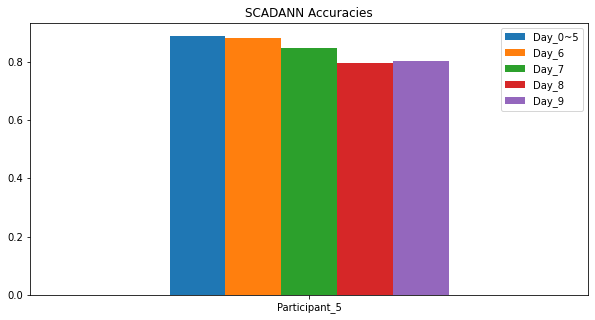

In [27]:
SCADANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("SCADANN Accuracies")
plt.show()

In [28]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_SCADANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 5)
predictions =  (1, 5)
index_participant_list  ['0~5', 6, 7, 8, 9]
accuracies_gestures =  (22, 5)


,Unnamed: 0,Loc1_Sub5_Day0~5->0~5,Loc1_Sub5_Day0~5->6,Loc1_Sub5_Day0~5->7,Loc1_Sub5_Day0~5->8,Loc1_Sub5_Day0~5->9
0,M0,1.000000,1.000000,1.000000,1.000000,1.000000
1,M1,0.955128,0.846154,0.615385,0.423077,0.576923
2,M2,0.846154,0.730769,0.846154,1.000000,0.923077
3,M3,0.942308,0.923077,1.000000,1.000000,0.384615
4,M4,0.852564,0.307692,0.115385,0.230769,0.000000
5,M5,0.993590,1.000000,0.884615,1.000000,0.961538
6,M6,0.961538,0.692308,1.000000,0.653846,1.000000
7,M7,0.980769,1.000000,1.000000,1.000000,1.000000
8,M8,0.935897,0.923077,0.461538,0.923077,0.923077
9,M9,0.935897,0.923077,0.807692,0.923077,0.692308


# Conclusion
Suppose there is a ndarray of NxM dataloaders, then N group of models will be trained, and each group will have M model. Each group is independent of the other, and each model within a group is dependent on its previous training weights.

In general, overall accuracies of SCADANN are better than DANN, and DANN is better than TSD.
Occasionally accuracies of SCADANN end up a little smaller than DANN, reasons may be lack of datasets put into training model (fixed) and non-optimal percentage_same_gesture_sable (fixed). Code should be reproducible if processed dataset sticks to the shape defined above.  

The amount of increase in accuracies from DANN to SCADANN looks random. But if the base model is better at classifying one session, then its corresponding SCADANN is also better at classifying the same session. Given such result, to obtain the best performance from SCADANN, a good model trained with good data should be the starting point.

* What to check if sth goes wrong:
    * percentage_same_gesture_sable
    * number of cycles or sessions
    * shape of dataloaders (combination of train, test, valid should include all dataset)
    * shape of procssed datasets
    * directory paths of weights and results
    * if weights are stored or loaded correcltyTSD_acc_overall_one = np.mean(TSD_acc, axis=0)

In [29]:
print("TSD")
display(TSD_df)
print("DANN")
display(DANN_df)
print("SCADANN")
display(SCADANN_df)

TSD


,Participant_5
Day_0~5,0.887529
Day_6,0.798951
Day_7,0.734266
Day_8,0.725524
Day_9,0.713287


DANN


,Participant_5
Day_0~5,0.887529
Day_6,0.86014
Day_7,0.828671
Day_8,0.763986
Day_9,0.734266


SCADANN


,Participant_5
Day_0~5,0.887529
Day_6,0.879371
Day_7,0.847902
Day_8,0.793706
Day_9,0.800699


In [30]:
diff_df = SCADANN_df-TSD_df
diff_df = diff_df.drop('Day_'+index_participant_list[0])
display(diff_df)
diff_df.to_csv(save_TSD+'/diff_results/across_day_loc1_lump6_diff.csv')

,Participant_5
Day_6,0.08042
Day_7,0.113636
Day_8,0.068182
Day_9,0.087413


In [31]:
overall_acc_df = pd.DataFrame([TSD_acc_overall, DANN_acc_overall, SCADANN_acc_overall],
                             index = ["TSD", "DANN", "SCADANN"],
                             columns = ["Overall_Acc"])
overall_acc_df

,Overall_Acc
TSD,0.771911
DANN,0.814918
SCADANN,0.841841


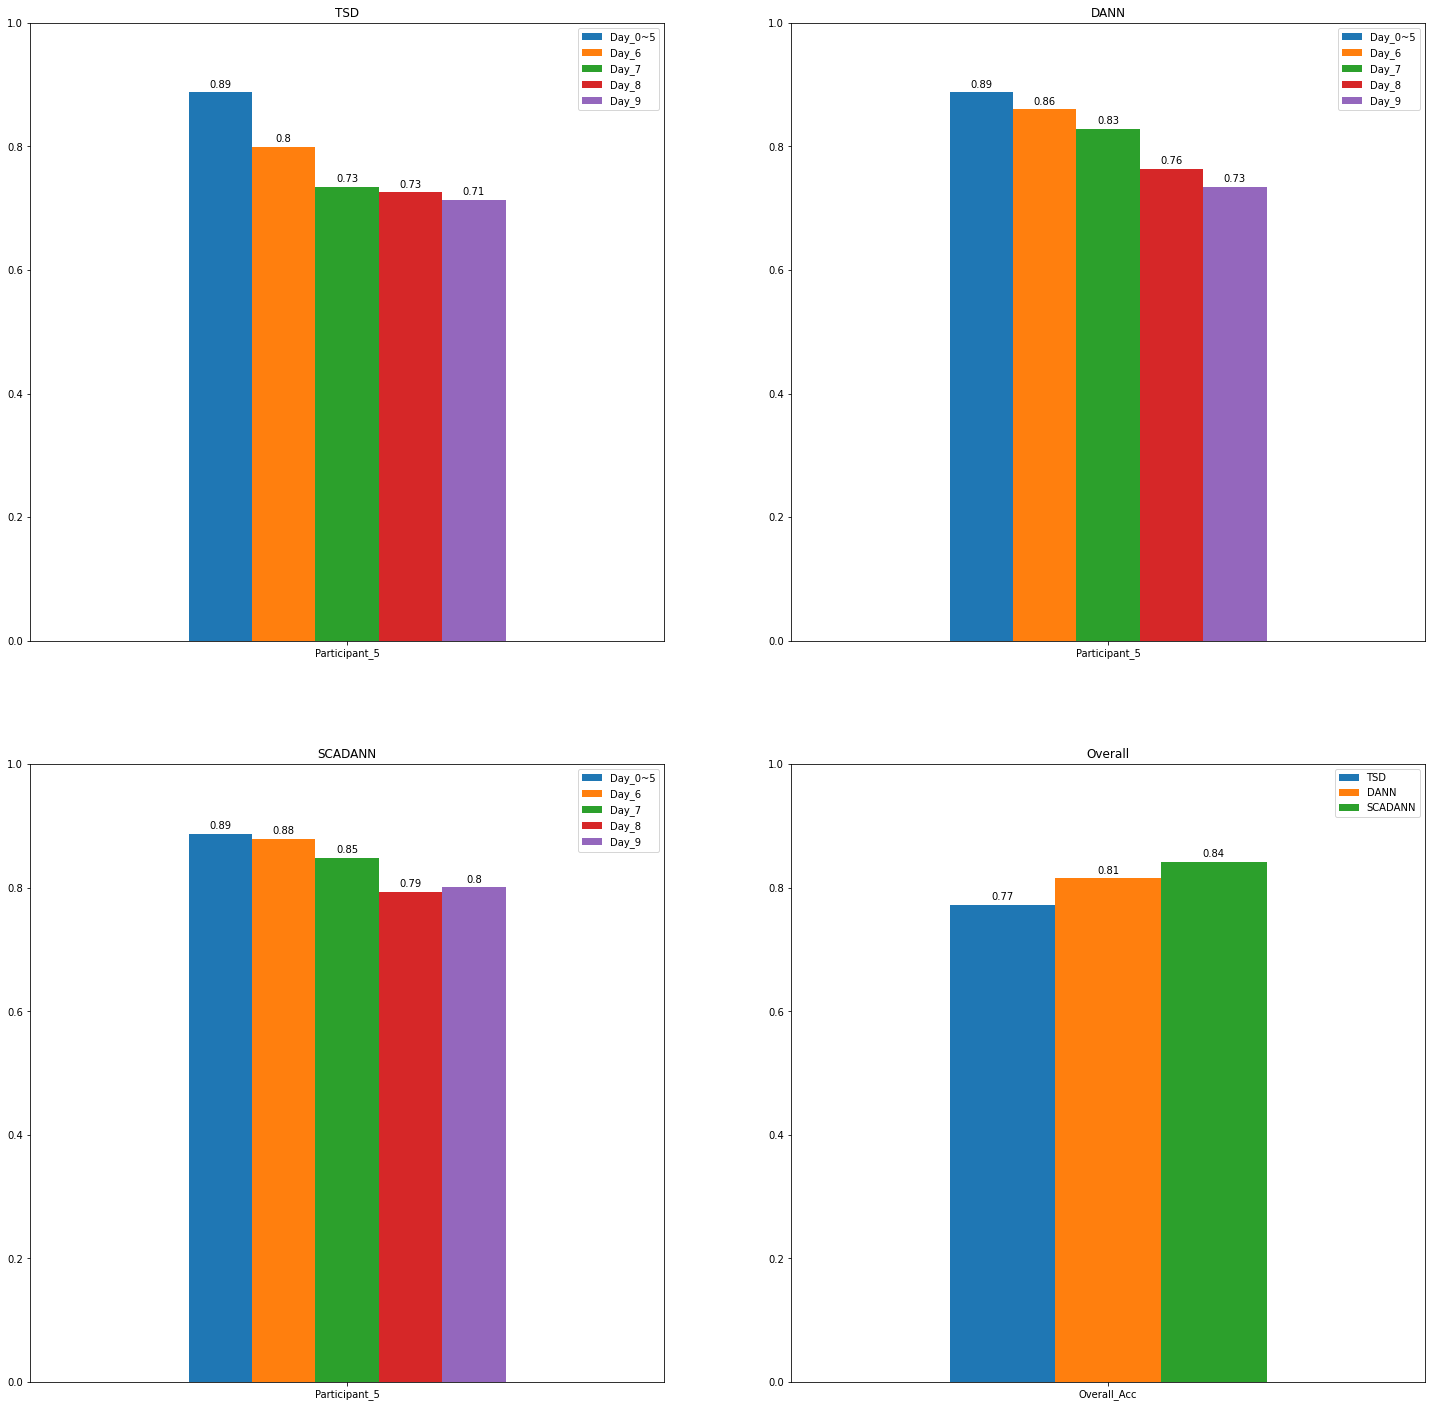

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,25))
acc_list = [TSD_df, DANN_df, SCADANN_df, overall_acc_df]
title_list = ["TSD", "DANN", "SCADANN", "Overall"]
for idx, ax in enumerate(axes.reshape(-1)): 
    acc_list[idx].transpose().plot.bar(ax = ax, rot=0)
    ax.set_title(title_list[idx])
    ax.set_ylim([0, 1.0])
    for p in ax.patches:
        ax.annotate(str(np.round(p.get_height(),2)), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8),textcoords='offset points')
